# 10.4 The Parametric Bootstrap

### Setup

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats, linalg

In [3]:
gfr = pd.read_csv("../data/gfr.txt", delimiter=" ", header=None, names=["gfr"])
gfr = gfr.gfr.values

In [4]:
gfr[:5]

array([108,  91,  62,  59,  84])

### Fit the Poisson models

As in section 5.5, we'll bin almost the same as described on page 171:
> The x-axis was partitioned into K=32 bins, with endpoints 13, 16, 19, ... 109

That partition didn't given me exactly the same histogram. When I use 13.5, 16.5, etc., I do get the same histogram

In [5]:
frequency, edges = np.histogram(gfr, bins=np.arange(13.5, 112, 3))

In [6]:
centers = (edges[:-1] + edges[1:]) / 2

In [7]:
edges

array([ 13.5,  16.5,  19.5,  22.5,  25.5,  28.5,  31.5,  34.5,  37.5,
        40.5,  43.5,  46.5,  49.5,  52.5,  55.5,  58.5,  61.5,  64.5,
        67.5,  70.5,  73.5,  76.5,  79.5,  82.5,  85.5,  88.5,  91.5,
        94.5,  97.5, 100.5, 103.5, 106.5, 109.5])

The first function below creates the powers of the gfr data. The second function fits the Poisson model and returns fitted points for the graph

In [8]:
# https://stackoverflow.com/a/41317397

def make_poly(x, degree, orthogonal=False):
    x_mat = np.transpose(np.vstack((x**k for k in range(degree + 1))))
    if orthogonal:
        x_mat = np.linalg.qr(x_mat)[0]
        x_mat[:, 0] = 1
    columns = ["x{}".format(i) for i in range(degree + 1)]
    return pd.DataFrame(x_mat, columns=columns)

In [9]:
def poisson_pts(y, x, degree, orthogonal=False, print_summary=False):
    # create polynomial dataset
    X = make_poly(x, degree, orthogonal)
    #pd.DataFrame({"x{}".format(i): x**i for i in range(degree + 1)})

    # fit model
    model = sm.GLM(y, X, family=sm.families.Poisson())
    results = model.fit()
    
    if print_summary:
        print(results.summary())
    
    # get y-values at input values
    y_center = results.predict(X)

    # make x,y points for the line
    if orthogonal:
        x_line = x
    else:
        x_line = np.arange(15, 109, 1)
    graph_X = make_poly(x_line, degree, orthogonal)
    # pd.DataFrame({"x{}".format(i): x_line**i for i in range(degree + 1)})
    y_line = results.predict(graph_X)

    return x_line, y_line, y_center

### Figure 10.5

Equation 10.55 on page 171 might give the impression that the powers of the bin counts are used in the model (i.e., that the $\hat{\beta}$ values are coefficients from the model). In fact, the powers are converted to orthogonal polynomials (through R's `poly` function).

#### Version 1: Non-orthogonal polynomials

In [10]:
x, y2, y2_center = poisson_pts(frequency, centers, degree=2)
_, y3, y3_center = poisson_pts(frequency, centers, degree=3)
_, y4, y4_center = poisson_pts(frequency, centers, degree=4)
_, y5, y5_center = poisson_pts(frequency, centers, degree=5)
_, y6, y6_center = poisson_pts(frequency, centers, degree=6)
_, y7, y7_center = poisson_pts(frequency, centers, degree=7)

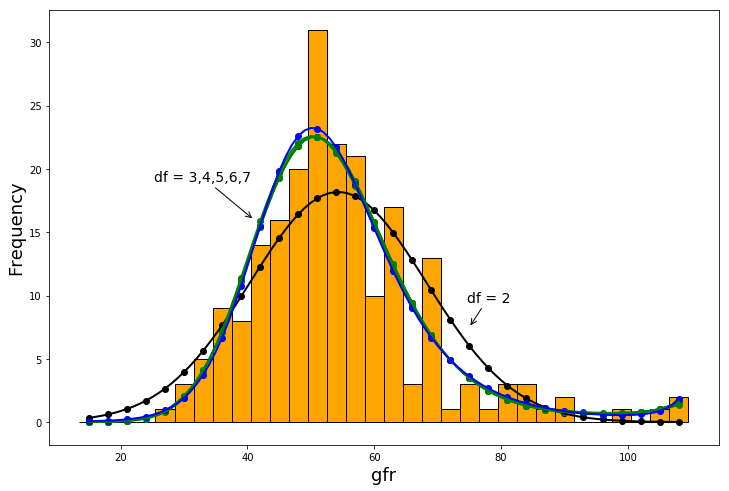

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(
    centers,
    frequency,
    width=np.diff(edges),
    align="center",
    edgecolor="k",
    color="orange",
    zorder=-1,
)

ax.plot(x, y2, c="k", linewidth=2)
ax.scatter(centers, y2_center, c="k")

ax.plot(x, y3, c="g", linewidth=2)
ax.scatter(centers, y3_center, c="g")

ax.plot(x, y4, c="g", linewidth=2)
ax.scatter(centers, y4_center, c="g")

ax.plot(x, y5, c="g", linewidth=2)
ax.scatter(centers, y5_center, c="g")

ax.plot(x, y6, c="g", linewidth=2)
ax.scatter(centers, y6_center, c="g")

ax.plot(x, y7, c="b", linewidth=2)
ax.scatter(centers, y7_center, c="b")

ax.annotate(
    "df = 2",
    size=14,
    xy=(75, 7.5),
    xytext=(78, 9.5),
    arrowprops=dict(
        arrowstyle="->",
        facecolor="black",
    ),
    horizontalalignment="center",
)

ax.annotate(
    "df = 3,4,5,6,7",
    size=14,
    xy=(41, 16),
    xytext=(33, 19),
    arrowprops=dict(
        arrowstyle="->",
        facecolor="black",
    ),
    horizontalalignment="center",
)

ax.set_xlabel("gfr", size=18)
ax.set_ylabel("Frequency", size=18);

The lines look pretty similar to the book's, for df = 2, 3, 4, 5, 6. The line for df = 7 here looks far more similar to df = 3, 4, 5, 6 than the book's. That's because the book is actually using orthogonal polynomials (through R's `poly` function, as mentioned in the footnote on page 171).

#### Version 2: Orthogonal polynomials

In [12]:
x, y2, y2_center = poisson_pts(frequency, centers, degree=2, orthogonal=True)
_, y3, y3_center = poisson_pts(frequency, centers, degree=3, orthogonal=True)
_, y4, y4_center = poisson_pts(frequency, centers, degree=4, orthogonal=True)
_, y5, y5_center = poisson_pts(frequency, centers, degree=5, orthogonal=True)
_, y6, y6_center = poisson_pts(frequency, centers, degree=6, orthogonal=True)
_, y7, y7_center = poisson_pts(frequency, centers, degree=7, orthogonal=True)

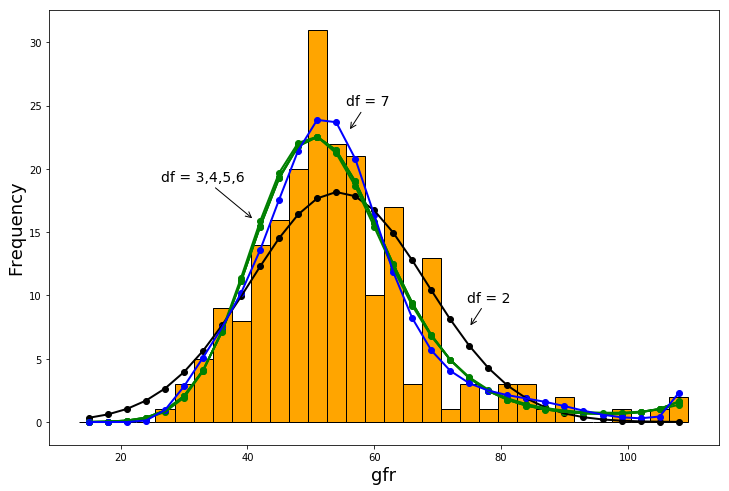

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(
    centers,
    frequency,
    width=np.diff(edges),
    align="center",
    edgecolor="k",
    color="orange",
    zorder=-1,
)

ax.plot(x, y2, c="k", linewidth=2)
ax.scatter(centers, y2_center, c="k")

ax.plot(x, y3, c="g", linewidth=2)
ax.scatter(centers, y3_center, c="g")

ax.plot(x, y4, c="g", linewidth=2)
ax.scatter(centers, y4_center, c="g")

ax.plot(x, y5, c="g", linewidth=2)
ax.scatter(centers, y5_center, c="g")

ax.plot(x, y6, c="g", linewidth=2)
ax.scatter(centers, y6_center, c="g")

ax.plot(x, y7, c="b", linewidth=2)
ax.scatter(centers, y7_center, c="b")

ax.annotate(
    "df = 2",
    size=14,
    xy=(75, 7.5),
    xytext=(78, 9.5),
    arrowprops=dict(
        arrowstyle="->",
        facecolor="black",
    ),
    horizontalalignment="center",
)

ax.annotate(
    "df = 3,4,5,6",
    size=14,
    xy=(41, 16),
    xytext=(33, 19),
    arrowprops=dict(
        arrowstyle="->",
        facecolor="black",
    ),
    horizontalalignment="center",
)

ax.annotate(
    "df = 7",
    size=14,
    xy=(56, 23),
    xytext=(59, 25),
    arrowprops=dict(
        arrowstyle="->",
        facecolor="black",
    ),
    horizontalalignment="center",
)

ax.set_xlabel("gfr", size=18)
ax.set_ylabel("Frequency", size=18);

This is much more similar to the book's plot

### Bootstrap samples for Table 10.2

In [14]:
table_indices = [2, 5, 8, 11, 14, 17, 20, 23, 26]

In [15]:
centers[table_indices]

array([21., 30., 39., 48., 57., 66., 75., 84., 93.])

Once again, the bins centers in this notebook are different from the centers in the book

In [16]:
mu_hat = np.column_stack(
    (y2_center, y3_center, y4_center, y5_center, y6_center, y7_center)
)

In [17]:
n_obs = gfr.shape[0]
n_boots = 200
bootvals = np.zeros((6, len(table_indices), n_boots))
for b in range(n_boots):
    for df in range(2, 8):
        bootfreq = np.array(
            [stats.poisson.rvs(mu=mu) for mu in mu_hat[:, df - 2]]
        )
        _, _, mu_star = poisson_pts(bootfreq, centers, df, orthogonal=True)
        bootvals[df - 2, :, b] = mu_star[table_indices]

In [18]:
ses = np.sqrt(bootvals.var(ddof=1, axis=2))

### Table 10.2

In [19]:
n_gfr = gfr.shape[0]
binomial_ses = np.sqrt(frequency * (n_gfr - frequency) / n_gfr)
binomial_ses = binomial_ses[table_indices]

In [20]:
tmplt = " {:.1f}   {:.2f}   {:.2f}   {:.2f}   {:.2f}   {:.2f}   {:.2f}       {:.2f}"
print("                   Degrees of freedom")
print("       ----------------------------------------  Nonparametric")
print("  gfr     2      3      4      5      6      7   standard error")
print("---------------------------------------------------------------")
for index, row, b_se in zip(table_indices, ses.T, binomial_ses):
    print(tmplt.format(centers[index], *row, b_se))

                   Degrees of freedom
       ----------------------------------------  Nonparametric
  gfr     2      3      4      5      6      7   standard error
---------------------------------------------------------------
 21.0   0.35   0.07   0.12   0.13   0.13   0.04       0.00
 30.0   0.72   0.58   0.60   0.65   0.75   1.20       1.72
 39.0   1.06   1.30   1.46   1.69   1.74   1.70       2.77
 48.0   1.59   1.96   2.01   2.29   2.29   2.41       4.25
 57.0   1.77   1.66   1.77   1.97   1.87   2.43       4.35
 66.0   1.24   1.06   1.17   1.19   1.23   1.37       1.72
 75.0   0.83   0.61   0.60   0.70   0.78   0.68       1.72
 84.0   0.47   0.31   0.36   0.41   0.44   0.63       1.72
 93.0   0.17   0.21   0.28   0.31   0.36   0.41       0.00


### Eigenratios

In [21]:
score = pd.read_csv("../data/student_score.txt", delimiter=" ")

In [22]:
score.head()

,mech,vecs,alg,analy,stat
0,7,51,43,17,22
1,44,69,53,53,53
2,49,41,61,49,64
3,59,70,68,62,56
4,34,42,50,47,29


In [23]:
def eigenratio(dataframe):
    corr = dataframe.corr()
    eigvals = np.real(linalg.eigvals(corr))
    return eigvals.max() / eigvals.sum()

#### Nonparametric bootstrap, as in section 10.2

In [24]:
def nonpar_bootstrap(fn, dataframe, n_boots):
    n_obs = dataframe.shape[0]
    bootvals = []
    for _ in range(n_boots):
        bootdata = dataframe.sample(n=n_obs, replace=True)
        bootvals.append(fn(bootdata))
    return np.array(bootvals)

In [25]:
nonpar_bootvals = nonpar_bootstrap(eigenratio, dataframe=score, n_boots=2000)

In [26]:
nonpar_se = np.sqrt(nonpar_bootvals.var(ddof=1)).round(3)
print("s.e.: {:>.3f}".format(nonpar_se))

s.e.: 0.076


#### Parametric bootstrap

In [27]:
mu = score.mean().values

In [28]:
sigma = score.cov().values

In [29]:
n_boots = 2000
n_obs = score.shape[0]
par_bootvals = np.zeros(n_boots)
for i in range(n_boots):
    bootdata = pd.DataFrame(
        stats.multivariate_normal.rvs(mean=mu, cov=sigma, size=22),
        columns=score.columns
    )
    par_bootvals[i] = eigenratio(bootdata)

In [30]:
par_se = np.sqrt(par_bootvals.var(ddof=1)).round(3)
print("s.e.: {:>.3f}".format(par_se))

s.e.: 0.069


### Figure 10.6

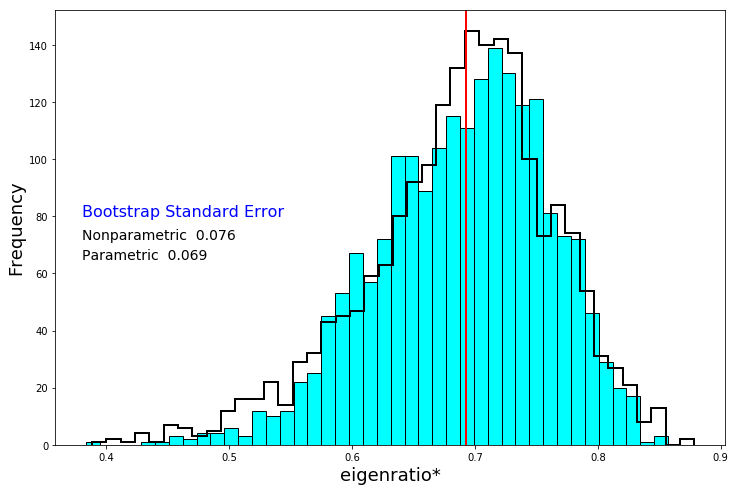

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(par_bootvals, bins=42, color="cyan", edgecolor="k")
ax.hist(nonpar_bootvals, bins=42, histtype="step", edgecolor="k", linewidth=2)

ax.axvline(eigenratio(score), c="r", linewidth=2)

ax.text(0.38, 80, "Bootstrap Standard Error", color="b", size=16, horizontalalignment="left")
ax.text(0.38, 72, "Nonparametric  {:>.3f}".format(nonpar_se), size=14, horizontalalignment="left")
ax.text(0.38, 65, "Parametric  {:>.3f}".format(par_se), size=14, horizontalalignment="left")

ax.set_xlabel("eigenratio*", size=18)
ax.set_ylabel("Frequency", size=18);

### Scatterplots of the score data

> the student score data is not a good candidate for normal modeling, having at least one notable outlier,<sup>7</sup> casting
doubt on the smaller estimate of standard error

> <sup>7</sup> As revealed by examining scatterplots of the five variates taken two at a time.

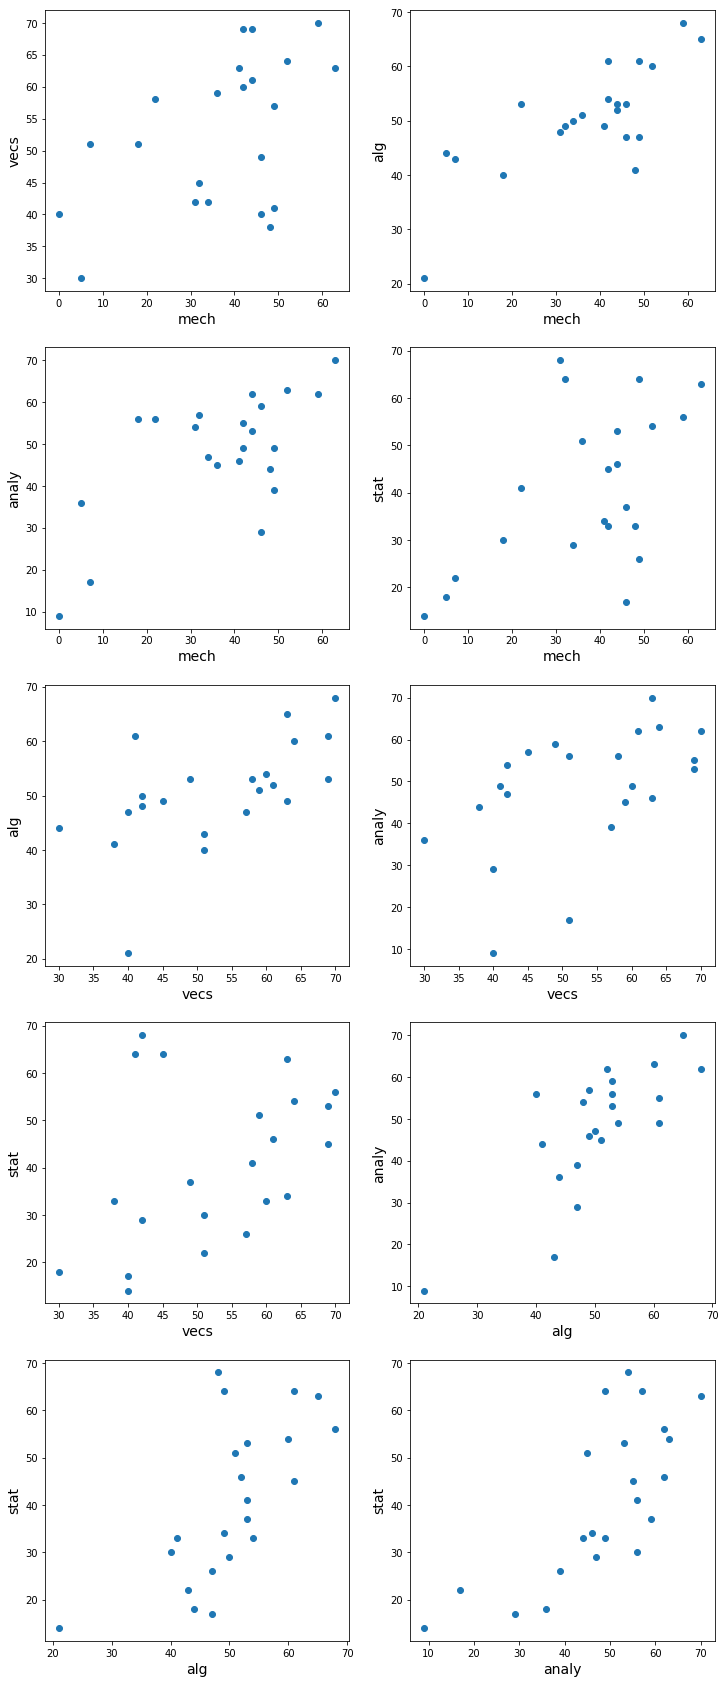

In [32]:
fig, ax = plt.subplots(5, 2, figsize=(12, 30))

plt_index = 0
for i, col_a in enumerate(score.columns[:-1]):
    for col_b in score.columns[i + 1:]:
        ax.flat[plt_index].scatter(score[col_a], score[col_b])
        ax.flat[plt_index].set_xlabel(col_a, size=14)
        ax.flat[plt_index].set_ylabel(col_b, size=14)
        plt_index += 1